In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

In [119]:
import pandas as pd

# 출력 옵션 설정
pd.set_option('display.max_rows', 50)  # 모든 행 출력
pd.set_option('display.max_columns', 50)  # 모든 열 출력

# 옵션 원래대로 되돌리기
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

데이터 불러오기

In [3]:
import pandas as pd
import numpy as np

data = pd.DataFrame()
for chunk in pd.read_csv("../ssd_data/combined_by_diskmodel/combined_MA1.csv", chunksize=100000):
    data = pd.concat([data, chunk], ignore_index=True)
data

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by='ds')
del(data['index'])
data

disk_id        ds model    n_1           r_1   n_5  r_5    n_9  \
0          10045  20190101   MA1  130.0  4.294967e+09  97.0  0.0  100.0   
19059       3614  20190101   MA1  130.0  4.294967e+09  96.0  0.0  100.0   
19058      36107  20190101   MA1  130.0  4.294967e+09  97.0  0.0  100.0   
19057      36104  20190101   MA1  130.0  4.294967e+09  98.0  0.0  100.0   
19056        361  20190101   MA1  130.0  3.276881e+09  95.0  2.0  100.0   
...          ...       ...   ...    ...           ...   ...  ...    ...   
4728266    17784  20190630   MA1  130.0  4.294967e+09  97.0  0.0  100.0   
4728265    17781  20190630   MA1  130.0  4.294967e+09  97.0  0.0  100.0   
4728264    17715  20190630   MA1  130.0  4.294967e+09  96.0  0.0  100.0   
4728273    17929  20190630   MA1  130.0  4.294967e+09  97.0  1.0  100.0   
4744314     9974  20190630   MA1  130.0  4.294967e+09  96.0  0.0  100.0   

             r_9   n_12  ...  r_244  n_245  r_245  n_175         r_175  n_232  \
0        38288.0    NaN  ...    NaN    NaN    NaN  100.0  9.752124e+11    NaN   
19059    44475.0  100.0  ...    NaN    NaN    NaN  100.0  1.125649e+12    NaN   
19058    40372.0  100.0  ...    NaN    NaN    NaN  100.0  1.014122e+12    NaN   
19057    40369.0  100.0  ...    NaN    NaN    NaN  100.0  1.014122e+12    NaN   
19056    46646.0  100.0  ...    NaN    NaN    NaN  100.0  1.181125e+12    NaN   
...          ...    ...  ...    ...    ...    ...    ...           ...    ...   
4728266  42460.0    NaN  ...    NaN    NaN    NaN  100.0  1.074284e+12    NaN   
4728265  42460.0    NaN  ...    NaN    NaN    NaN  100.0  1.074284e+12    NaN   
4728264  40284.0  100.0  ...    NaN    NaN    NaN  100.0  1.018248e+12    NaN   
4728273  49490.0  100.0  ...    NaN    NaN    NaN  100.0  1.241550e+12    NaN   
4744314  46623.0  100.0  ...    NaN    NaN    NaN  100.0  1.164486e+12    NaN   

         r_232  label  n_211  r_211  
0          NaN      0    NaN    NaN  
19059      NaN      0    NaN    NaN  
19058      NaN      0    NaN    NaN  
19057      NaN      0    NaN    NaN  
19056      NaN      0    NaN    NaN  
...        ...    ...    ...    ...  
4728266    NaN      0    NaN    NaN  
4728265    NaN      0    NaN    NaN  
4728264    NaN      0    NaN    NaN  
4728273    NaN      0    NaN    NaN  
4744314    NaN      0    NaN    NaN  

[4744315 rows x 72 columns]

In [5]:
data.shape

(4744315, 72)

In [4]:
data.columns

Index(['disk_id', 'ds', 'model', 'n_1', 'r_1', 'n_5', 'r_5', 'n_9', 'r_9',
       'n_12', 'r_12', 'n_170', 'r_170', 'n_171', 'r_171', 'n_172', 'r_172',
       'n_173', 'r_173', 'n_174', 'r_174', 'n_177', 'r_177', 'n_180', 'r_180',
       'n_181', 'r_181', 'n_182', 'r_182', 'n_183', 'r_183', 'n_184', 'r_184',
       'n_187', 'r_187', 'n_188', 'r_188', 'n_190', 'r_190', 'n_192', 'r_192',
       'n_194', 'r_194', 'n_195', 'r_195', 'n_196', 'r_196', 'n_197', 'r_197',
       'n_198', 'r_198', 'n_199', 'r_199', 'n_206', 'r_206', 'n_233', 'r_233',
       'n_241', 'r_241', 'n_242', 'r_242', 'n_244', 'r_244', 'n_245', 'r_245',
       'n_175', 'r_175', 'n_232', 'r_232', 'label', 'n_211', 'r_211'],
      dtype='object')

Null값으로 이루어진 열 제거

In [6]:
# null값이 있는 열을 제거하는 코드
def remove_null_columns(df):
    # null인 컬럼을 확인하고, 모든 값이 null인 컬럼을 찾습니다.
    null_columns = df.columns[df.isnull().all()]
    
    # 모든 값이 null인 컬럼을 DataFrame에서 제거합니다.
    df = df.drop(null_columns, axis=1)
    
    return df

In [7]:
data = remove_null_columns(data)
data.shape

(4744315, 44)

In [8]:
data.columns

Index(['disk_id', 'ds', 'model', 'n_1', 'r_1', 'n_5', 'r_5', 'n_9', 'r_9',
       'n_12', 'r_12', 'n_171', 'r_171', 'n_172', 'r_172', 'n_173', 'r_173',
       'n_174', 'r_174', 'n_180', 'r_180', 'n_184', 'r_184', 'n_187', 'r_187',
       'n_188', 'r_188', 'n_190', 'r_190', 'n_194', 'r_194', 'n_195', 'r_195',
       'n_196', 'r_196', 'n_197', 'r_197', 'n_198', 'r_198', 'n_199', 'r_199',
       'n_175', 'r_175', 'label'],
      dtype='object')

단일값으로만 이루어진 행 제거

In [9]:
def remove_single_value_columns(df):
    single_value_cols = []
    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values == 1:
            single_value_cols.append(col)
    print(single_value_cols)
    df_filtered = df.drop(single_value_cols, axis=1)
    return df_filtered

In [10]:
data = remove_single_value_columns(data)

['model', 'n_1', 'n_9', 'n_12', 'r_173', 'n_174', 'n_187', 'n_188', 'n_194', 'n_195', 'n_197', 'n_198', 'n_199']


(4744315, 31)

null값 지우고 하나의 데이터로만 이루어진 열을 제거한 데이터 프레임 shape과 columns확인

In [22]:
data.shape

(4744315, 31)

In [21]:
column = data.columns
column

Index(['disk_id', 'ds', 'r_1', 'n_5', 'r_5', 'r_9', 'r_12', 'n_171', 'r_171',
       'n_172', 'r_172', 'n_173', 'r_174', 'n_180', 'r_180', 'n_184', 'r_184',
       'r_187', 'r_188', 'n_190', 'r_190', 'r_194', 'r_195', 'n_196', 'r_196',
       'r_197', 'r_198', 'r_199', 'n_175', 'r_175', 'label'],
      dtype='object')

In [20]:
data

disk_id         ds           r_1   n_5  r_5      r_9  r_12  n_171  \
0          10045 2019-01-01  4.294967e+09  97.0  0.0  38288.0   NaN    NaN   
19059       3614 2019-01-01  4.294967e+09  96.0  0.0  44475.0  26.0  100.0   
19058      36107 2019-01-01  4.294967e+09  97.0  0.0  40372.0  37.0  100.0   
19057      36104 2019-01-01  4.294967e+09  98.0  0.0  40369.0  37.0  100.0   
19056        361 2019-01-01  3.276881e+09  95.0  2.0  46646.0  39.0  100.0   
...          ...        ...           ...   ...  ...      ...   ...    ...   
4728266    17784 2019-06-30  4.294967e+09  97.0  0.0  42460.0   NaN    NaN   
4728265    17781 2019-06-30  4.294967e+09  97.0  0.0  42460.0   NaN    NaN   
4728264    17715 2019-06-30  4.294967e+09  96.0  0.0  40284.0  52.0  100.0   
4728273    17929 2019-06-30  4.294967e+09  97.0  1.0  49490.0  47.0  100.0   
4744314     9974 2019-06-30  4.294967e+09  96.0  0.0  46623.0  44.0  100.0   

         r_171  n_172  ...  r_194         r_195  n_196  r_196  r_197  r_198  \
0          NaN    NaN  ...   12.0           NaN  100.0    0.0    NaN    NaN   
19059      0.0  100.0  ...   11.0  1.120414e+09  100.0    0.0    0.0    0.0   
19058      0.0  100.0  ...   16.0  8.552900e+05  100.0    0.0    0.0    0.0   
19057      0.0  100.0  ...   16.0  1.044777e+06  100.0    0.0    0.0    0.0   
19056      1.0  100.0  ...   16.0  1.091491e+06   99.0    2.0    0.0    0.0   
...        ...    ...  ...    ...           ...    ...    ...    ...    ...   
4728266    NaN    NaN  ...   16.0           NaN  100.0    0.0    NaN    NaN   
4728265    NaN    NaN  ...   15.0           NaN  100.0    0.0    NaN    NaN   
4728264    0.0  100.0  ...   14.0  8.232852e+06  100.0    0.0    0.0    0.0   
4728273    0.0  100.0  ...   14.0  4.142201e+08   99.0    1.0    0.0    0.0   
4744314    0.0  100.0  ...   14.0  3.944694e+08  100.0    0.0    0.0    0.0   

         r_199  n_175         r_175  label  
0          NaN  100.0  9.752124e+11      0  
19059      0.0  100.0  1.125649e+12      0  
19058      0.0  100.0  1.014122e+12      0  
19057      0.0  100.0  1.014122e+12      0  
19056      0.0  100.0  1.181125e+12      0  
...        ...    ...           ...    ...  
4728266    NaN  100.0  1.074284e+12      0  
4728265    NaN  100.0  1.074284e+12      0  
4728264    0.0  100.0  1.018248e+12      0  
4728273    0.0  100.0  1.241550e+12      0  
4744314    0.0  100.0  1.164486e+12      0  

[4744315 rows x 31 columns]

In [111]:
unique_disk_ids = data['disk_id'].nunique()
print("disk_id의 고유 개수:", unique_disk_ids)

disk_id의 고유 개수: 33990


fail이 일어난 행들 확인

In [62]:
data[data['label']==1]

disk_id         ds           r_1   n_5    r_5      r_9  r_12  n_171  \
55936      23729 2019-01-02  4.294967e+09  98.0    2.0  40175.0  28.0  100.0   
55019       3401 2019-01-02  4.294967e+09  98.0    0.0  40012.0  59.0  100.0   
75070      30146 2019-01-03  4.294967e+09  98.0    0.0  36922.0  30.0  100.0   
70405      41793 2019-01-03  4.294967e+09  98.0    0.0  36522.0  28.0  100.0   
106266     37927 2019-01-04  4.294967e+09  94.0  141.0  37481.0  30.0   99.0   
...          ...        ...           ...   ...    ...      ...   ...    ...   
4112479     4402 2019-06-03  4.294967e+09  98.0    3.0  41148.0  34.0  100.0   
4178901    34874 2019-06-05  4.294967e+09  98.0    0.0  40585.0  28.0  100.0   
4175174     1230 2019-06-05  4.294967e+09  98.0    0.0  44244.0  27.0  100.0   
4195779    38773 2019-06-06  4.294967e+09  98.0    2.0  44298.0  37.0  100.0   
4182969    31327 2019-06-06  4.294967e+09  98.0    0.0  42078.0  44.0  100.0   

         r_171  n_172  ...  r_194         r_195  n_196  r_196  r_197  r_198  \
55936      4.0  100.0  ...   20.0  1.067805e+09   99.0    2.0    0.0    0.0   
55019      0.0  100.0  ...   16.0  2.260676e+09  100.0    0.0    0.0    0.0   
75070      0.0  100.0  ...   18.0  1.591232e+09  100.0    0.0    0.0    0.0   
70405      0.0  100.0  ...   14.0  2.791970e+08  100.0    0.0    0.0    0.0   
106266    70.0  100.0  ...    8.0  2.748596e+09   97.0  141.0    0.0    0.0   
...        ...    ...  ...    ...           ...    ...    ...    ...    ...   
4112479    1.0  100.0  ...   15.0  4.670091e+08   99.0    3.0    0.0    0.0   
4178901    0.0  100.0  ...   15.0  1.579518e+09  100.0    0.0    0.0    0.0   
4175174    0.0  100.0  ...   19.0  2.581993e+09  100.0    0.0    0.0    0.0   
4195779    2.0  100.0  ...   16.0  1.970826e+09   99.0    2.0    0.0    0.0   
4182969    0.0  100.0  ...   17.0  3.873290e+09  100.0    0.0    0.0    0.0   

         r_199  n_175         r_175  label  
55936      0.0  100.0  1.018337e+12      1  
55019      0.0  100.0  1.005077e+12      1  
75070      0.0  100.0  9.407059e+11      1  
70405      0.0  100.0  9.280304e+11      1  
106266     0.0  100.0  9.497040e+11      1  
...        ...    ...           ...    ...  
4112479    0.0  100.0  1.039979e+12      1  
4178901    0.0  100.0  1.035432e+12      1  
4175174    0.0  100.0  1.125316e+12      1  
4195779    0.0  100.0  1.121018e+12      1  
4182969    0.0  100.0  1.057160e+12      1  

[275 rows x 31 columns]

전체가 null인 컬럼과 단일값으로 이루어진 컬럼을 제거한 data에서 이제 null값을 알아보겠다.

In [126]:
null_counts = data.isnull().sum()
null_counts

disk_id          0
ds               0
r_1            182
n_5            180
r_5            180
r_9            178
r_12       1299860
n_171      1299846
r_171      1299846
n_172      1299847
r_172      1299847
n_173          182
r_174      1299856
n_180          180
r_180          180
n_184      1299850
r_184      1299850
r_187      1299851
r_188      1299846
n_190      1299847
r_190      1299847
r_194          182
r_195      1299856
n_196          191
r_196          191
r_197      1299862
r_198      1299862
r_199      1299866
n_175          180
r_175          180
label            0
dtype: int64

?? 몇개의 feature에서는 180개 정도의 결측치가 있고 몇개의 feature에서는 1299850정도의 결측치가 있다.</br>
여기에서 disk_id별로 날짜를 다시 sort해서 그림으로 보자

In [127]:
sorted_data = data.sort_values(by=['disk_id', 'ds'])
# 결과 출력
sorted_data

disk_id         ds           r_1   n_5  r_5      r_9  r_12  n_171  \
717975        12 2019-01-26  1.745309e+09  98.0  0.0  39291.0  60.0  100.0   
741568        12 2019-01-27  3.620582e+09  98.0  0.0  39315.0  60.0  100.0   
755075        12 2019-01-28  4.294967e+09  98.0  0.0  39339.0  60.0  100.0   
793248        12 2019-01-29  4.294967e+09  98.0  0.0  39362.0  60.0  100.0   
830717        12 2019-01-30  4.294967e+09  98.0  0.0  39386.0  60.0  100.0   
...          ...        ...           ...   ...  ...      ...   ...    ...   
4628684    43297 2019-06-26  2.706945e+09  93.0  0.0  50774.0  32.0  100.0   
4665712    43297 2019-06-27  2.731255e+09  93.0  0.0  50796.0  32.0  100.0   
4685287    43297 2019-06-28  2.756229e+09  93.0  0.0  50820.0  32.0  100.0   
4703761    43297 2019-06-29  2.781762e+09  93.0  0.0  50844.0  32.0  100.0   
4723392    43297 2019-06-30  2.807087e+09  93.0  0.0  50867.0  32.0  100.0   

         r_171  n_172  r_172  n_173  r_174  n_180         r_180  n_184  r_184  \
717975     0.0  100.0    0.0   10.0   58.0  130.0  1.860726e+09  100.0    0.0   
741568     0.0  100.0    0.0   10.0   58.0  130.0  3.736003e+09  100.0    0.0   
755075     0.0  100.0    0.0   10.0   58.0  130.0  4.294967e+09  100.0    0.0   
793248     0.0  100.0    0.0   10.0   58.0  130.0  4.294967e+09  100.0    0.0   
830717     0.0  100.0    0.0   10.0   58.0  130.0  4.294967e+09  100.0    0.0   
...        ...    ...    ...    ...    ...    ...           ...    ...    ...   
4628684    0.0  100.0    0.0   86.0   29.0  130.0  4.294967e+09  100.0    0.0   
4665712    0.0  100.0    0.0   86.0   29.0  130.0  4.294967e+09  100.0    0.0   
4685287    0.0  100.0    0.0   86.0   29.0  130.0  4.294967e+09  100.0    0.0   
4703761    0.0  100.0    0.0   86.0   29.0  130.0  4.294967e+09  100.0    0.0   
4723392    0.0  100.0    0.0   86.0   29.0  130.0  4.294967e+09  100.0    0.0   

         r_187  r_188  n_190  r_190  r_194        r_195  n_196  r_196  r_197  \
717975     0.0    0.0   88.0   12.0   12.0  428404580.0  100.0    0.0    0.0   
741568     0.0    0.0   89.0   11.0   11.0  428404582.0  100.0    0.0    0.0   
755075     0.0    0.0   89.0   11.0   11.0  428404583.0  100.0    0.0    0.0   
793248     0.0    0.0   88.0   12.0   12.0  428404584.0  100.0    0.0    0.0   
830717     0.0    0.0   89.0   11.0   11.0  428404586.0  100.0    0.0    0.0   
...        ...    ...    ...    ...    ...          ...    ...    ...    ...   
4628684    0.0    0.0   83.0   17.0   17.0     517500.0  100.0    0.0    0.0   
4665712    0.0    0.0   83.0   17.0   17.0     517500.0  100.0    0.0    0.0   
4685287    0.0    0.0   83.0   17.0   17.0     517500.0  100.0    0.0    0.0   
4703761    0.0    0.0   83.0   17.0   17.0     517500.0  100.0    0.0    0.0   
4723392    0.0    0.0   83.0   17.0   17.0     517500.0  100.0    0.0    0.0   

         r_198  r_199  n_175         r_175  label  
717975     0.0    0.0  100.0  9.835897e+11      0  
741568     0.0    0.0  100.0  9.836836e+11      0  
755075     0.0    0.0  100.0  9.837775e+11      0  
793248     0.0    0.0  100.0  9.838715e+11      0  
830717     0.0    0.0  100.0  9.839654e+11      0  
...        ...    ...    ...           ...    ...  
4628684    0.0    0.0  100.0  1.279911e+12      0  
4665712    0.0    0.0  100.0  1.279996e+12      0  
4685287    0.0    0.0  100.0  1.280090e+12      0  
4703761    0.0    0.0  100.0  1.280184e+12      0  
4723392    0.0    0.0  100.0  1.280278e+12      0  

[4744315 rows x 31 columns]

<AxesSubplot:>

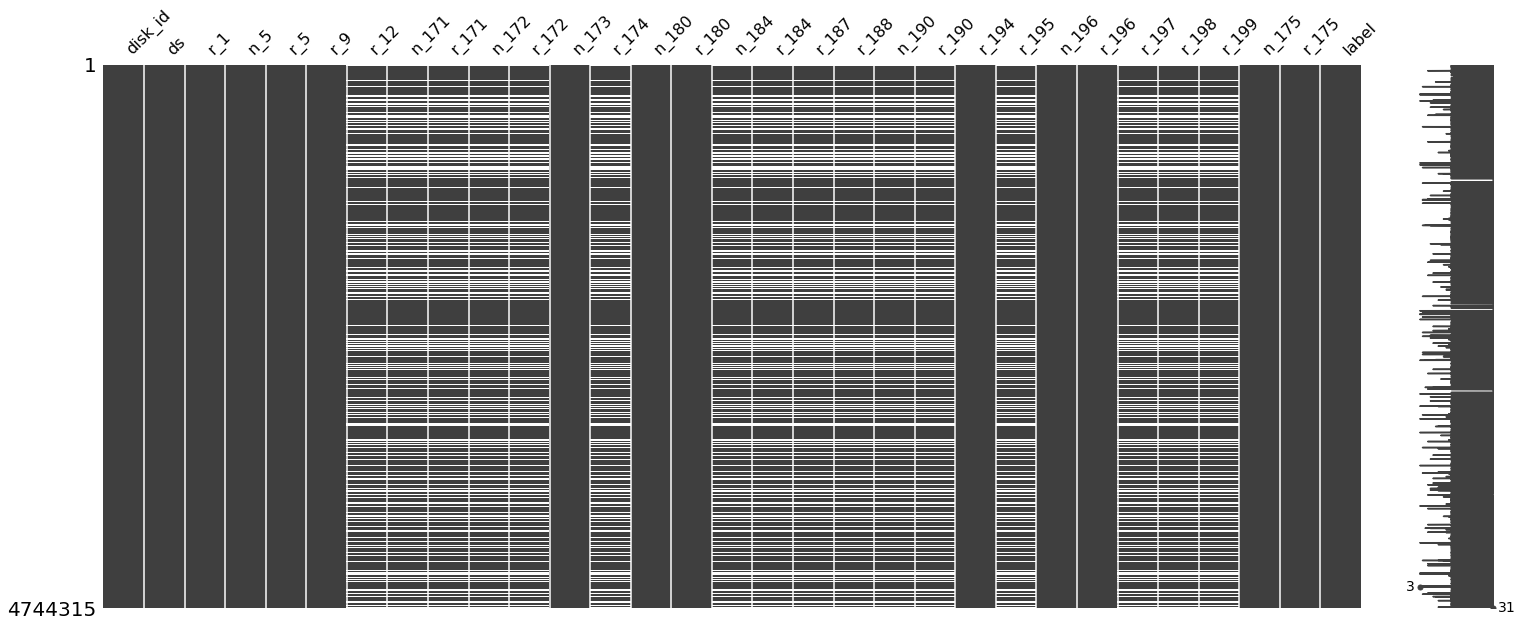

In [128]:
import missingno as msno
msno.matrix(sorted_data)

그림으로 보니까 이 null값들은 동시에 같이 가지는거같다. 그래서 동시에 이 feature에 대해서 null값을 가지는지 알아보자. 일단 지금은 1299850 정도의 결측치가 있는 컬럼에 적용시켜보자

In [129]:
# 원하는 컬럼 리스트
desired_columns = ['r_12', 'n_171', 'r_171', 'n_172', 'r_172', 'r_174', 'n_184', 'r_184', 'r_187', 'r_188', 'n_190', 'r_190', 'r_195', 'r_197', 'r_198', 'r_199']

# 동시에 null 값을 가지는 행 개수 계산
null_counts = data[desired_columns].isnull().all(axis=1).sum()

# 결과 출력
print("동시에 null 값을 가지는 행 개수:", null_counts)

동시에 null 값을 가지는 행 개수: 1299740


In [ ]:
# 원하는 컬럼 리스트
desired_columns = ['r_12', 'n_171', 'r_171', 'n_172', 'r_172', 'r_174', 'n_184', 'r_184', 'r_187', 'r_188', 'n_190', 'r_190', 'r_195', 'r_197', 'r_198', 'r_199']

# 동시에 null 값을 가지는 행 개수 계산
null_counts = data[desired_columns].isnull().all(axis=1).sum()

# 결과 출력
print("동시에 null 값을 가지는 행 개수:", null_counts)

disk_id랑 feature별로 scatter plot을 그려서 데이터 추세 파악하기</br>
이때 날짜가 없는 행은 null값으로 채운다

C:\Users\passion\AppData\Local\Temp/ipykernel_29568/574790240.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = pd.to_datetime(filtered_df['ds'], format='%Y%m%d')


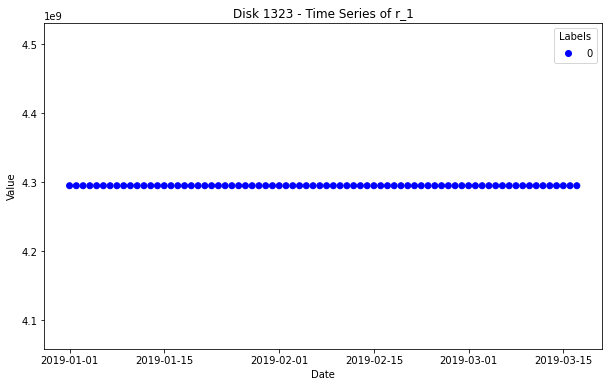

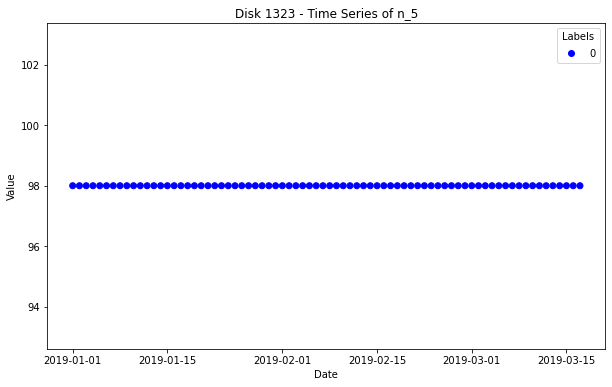

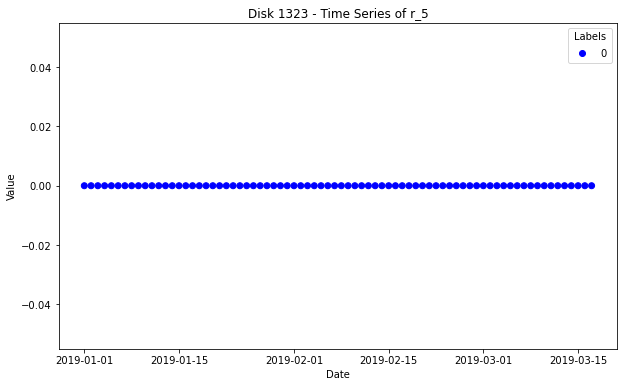

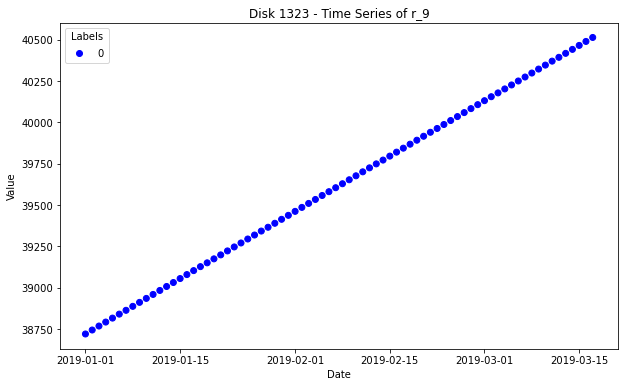

No non-missing data for feature r_12.
No non-missing data for feature n_171.
No non-missing data for feature r_171.
No non-missing data for feature n_172.
No non-missing data for feature r_172.


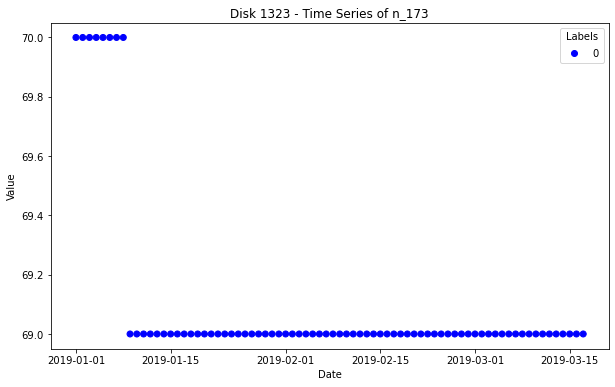

No non-missing data for feature r_174.


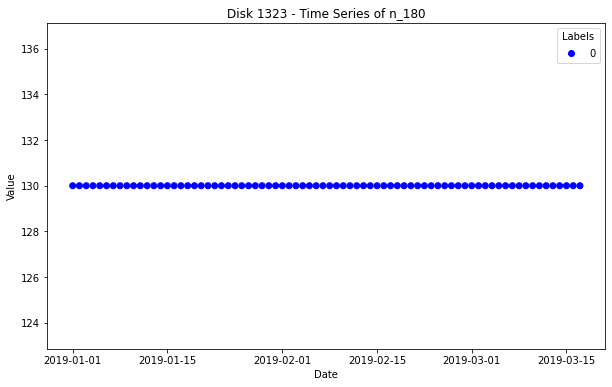

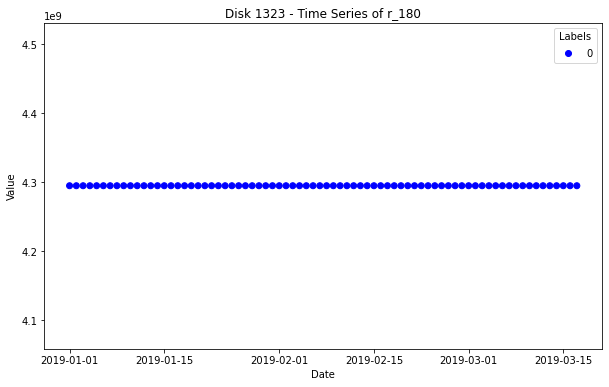

No non-missing data for feature n_184.
No non-missing data for feature r_184.
No non-missing data for feature r_187.
No non-missing data for feature r_188.
No non-missing data for feature n_190.
No non-missing data for feature r_190.


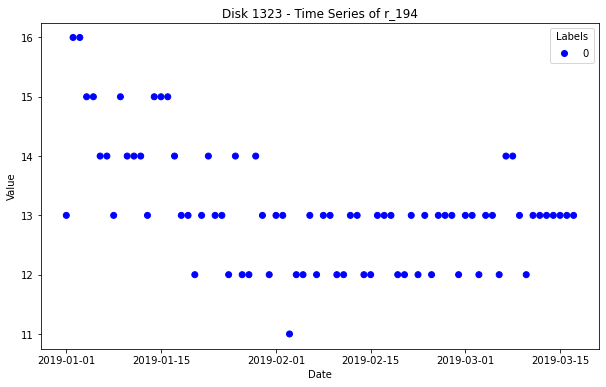

No non-missing data for feature r_195.


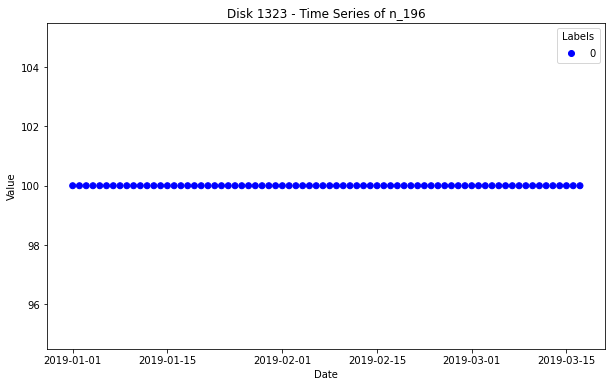

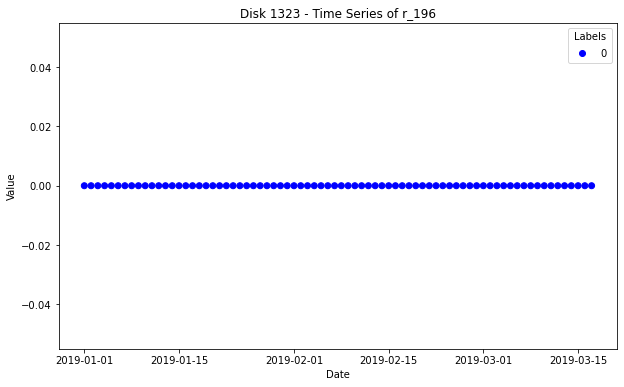

No non-missing data for feature r_197.
No non-missing data for feature r_198.
No non-missing data for feature r_199.


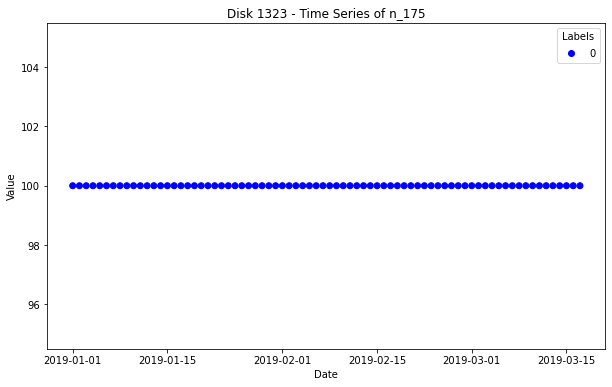

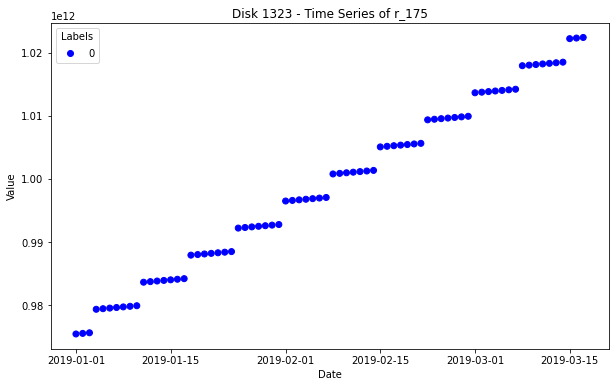

In [153]:
disk_id = 1323
features = ['r_1', 'n_5', 'r_5', 'r_9', 'r_12', 'n_171', 'r_171',
       'n_172', 'r_172', 'n_173', 'r_174', 'n_180', 'r_180', 'n_184', 'r_184',
       'r_187', 'r_188', 'n_190', 'r_190', 'r_194', 'r_195', 'n_196', 'r_196',
       'r_197', 'r_198', 'r_199', 'n_175', 'r_175']

filtered_df = data[data['disk_id'] == disk_id]

if filtered_df.empty:
    print(f"No data available for disk_id {disk_id}.")
else:
    # 날짜(ds)를 datetime 형식으로 변환
    filtered_df['ds'] = pd.to_datetime(filtered_df['ds'], format='%Y%m%d')
    
    # 모든 날짜를 생성합니다.
    all_dates = pd.date_range(start=filtered_df['ds'].min(), end=filtered_df['ds'].max())
    
    # 모든 날짜를 포함하도록 filtered_df를 확장합니다.
    filtered_df = filtered_df.set_index('ds').reindex(all_dates).rename_axis('ds').reset_index()
    
    # label 결측치에 2를 할당합니다.
    filtered_df['label'] = filtered_df['label'].fillna(2)
    
    # 인덱스 재설정
    filtered_df = filtered_df.reset_index(drop=True)

    for feature in features:
        # 결측치가 아닌 값들에 대한 마스크를 생성합니다.
        mask = ~np.isnan(filtered_df[feature])  
        if mask.sum() > 0:  # NaN이 아닌 값이 있는지 확인합니다.
            fig, ax = plt.subplots(figsize=(10, 6))
            sc = ax.scatter(filtered_df['ds'].values[mask], filtered_df[feature].values[mask], c=filtered_df['label'].values[mask], cmap='bwr')
            ax.set_xlabel('Date')
            ax.set_ylabel('Value')
            ax.set_title(f'Disk {disk_id} - Time Series of {feature}')
            ax.legend(*sc.legend_elements(), title="Labels")
            plt.show()
        else:
            print(f"No non-missing data for feature {feature}.")

In [154]:
null_counts = filtered_df.isnull().sum()
print(null_counts)

ds          0
disk_id     0
r_1         0
n_5         0
r_5         0
r_9         0
r_12       76
n_171      76
r_171      76
n_172      76
r_172      76
n_173       0
r_174      76
n_180       0
r_180       0
n_184      76
r_184      76
r_187      76
r_188      76
n_190      76
r_190      76
r_194       0
r_195      76
n_196       0
r_196       0
r_197      76
r_198      76
r_199      76
n_175       0
r_175       0
label       0
dtype: int64


In [155]:
missing_dates = filtered_df[filtered_df[feature].isnull()]['ds']
print("Missing Dates:")
for date in missing_dates:
    print(date)

Missing Dates:


In [82]:
filtered_df

ds  disk_id           r_1   n_5  r_5      r_9  r_12  n_171  r_171  \
0   2019-01-01  41793.0  4.294967e+09  98.0  0.0  36474.0  28.0  100.0    0.0   
1   2019-01-02  41793.0  4.294967e+09  98.0  0.0  36498.0  28.0  100.0    0.0   
2   2019-01-03  41793.0  4.294967e+09  98.0  0.0  36522.0  28.0  100.0    0.0   
3   2019-01-04  41793.0  4.294967e+09  98.0  0.0  36546.0  28.0  100.0    0.0   
4   2019-01-05  41793.0  4.294967e+09  98.0  0.0  36569.0  28.0  100.0    0.0   
..         ...      ...           ...   ...  ...      ...   ...    ...    ...   
174 2019-06-24      NaN           NaN   NaN  NaN      NaN   NaN    NaN    NaN   
175 2019-06-25      NaN           NaN   NaN  NaN      NaN   NaN    NaN    NaN   
176 2019-06-26      NaN           NaN   NaN  NaN      NaN   NaN    NaN    NaN   
177 2019-06-27      NaN           NaN   NaN  NaN      NaN   NaN    NaN    NaN   
178 2019-06-28  41793.0  4.294967e+09  98.0  0.0  40727.0  28.0  100.0    0.0   

     n_172  ...  r_194        r_195  n_196  r_196  r_197  r_198  r_199  n_175  \
0    100.0  ...   16.0  278418415.0  100.0    0.0    0.0    0.0    0.0  100.0   
1    100.0  ...   17.0  278813088.0  100.0    0.0    0.0    0.0    0.0  100.0   
2    100.0  ...   14.0  279197013.0  100.0    0.0    0.0    0.0    0.0  100.0   
3    100.0  ...   18.0  279597428.0  100.0    0.0    0.0    0.0    0.0  100.0   
4    100.0  ...   14.0  280000936.0  100.0    0.0    0.0    0.0    0.0  100.0   
..     ...  ...    ...          ...    ...    ...    ...    ...    ...    ...   
174    NaN  ...    NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN   
175    NaN  ...    NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN   
176    NaN  ...    NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN   
177    NaN  ...    NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN   
178  100.0  ...   16.0  335534716.0  100.0    0.0    0.0    0.0    0.0  100.0   

            r_175  label  
0    9.278426e+11    0.0  
1    9.279366e+11    0.0  
2    9.280304e+11    1.0  
3    9.281244e+11    0.0  
4    9.282184e+11    0.0  
..            ...    ...  
174           NaN    2.0  
175           NaN    2.0  
176           NaN    2.0  
177           NaN    2.0  
178  1.035428e+12    0.0  

[179 rows x 31 columns]

In [72]:
data.shape

(4744315, 31)

<AxesSubplot:>

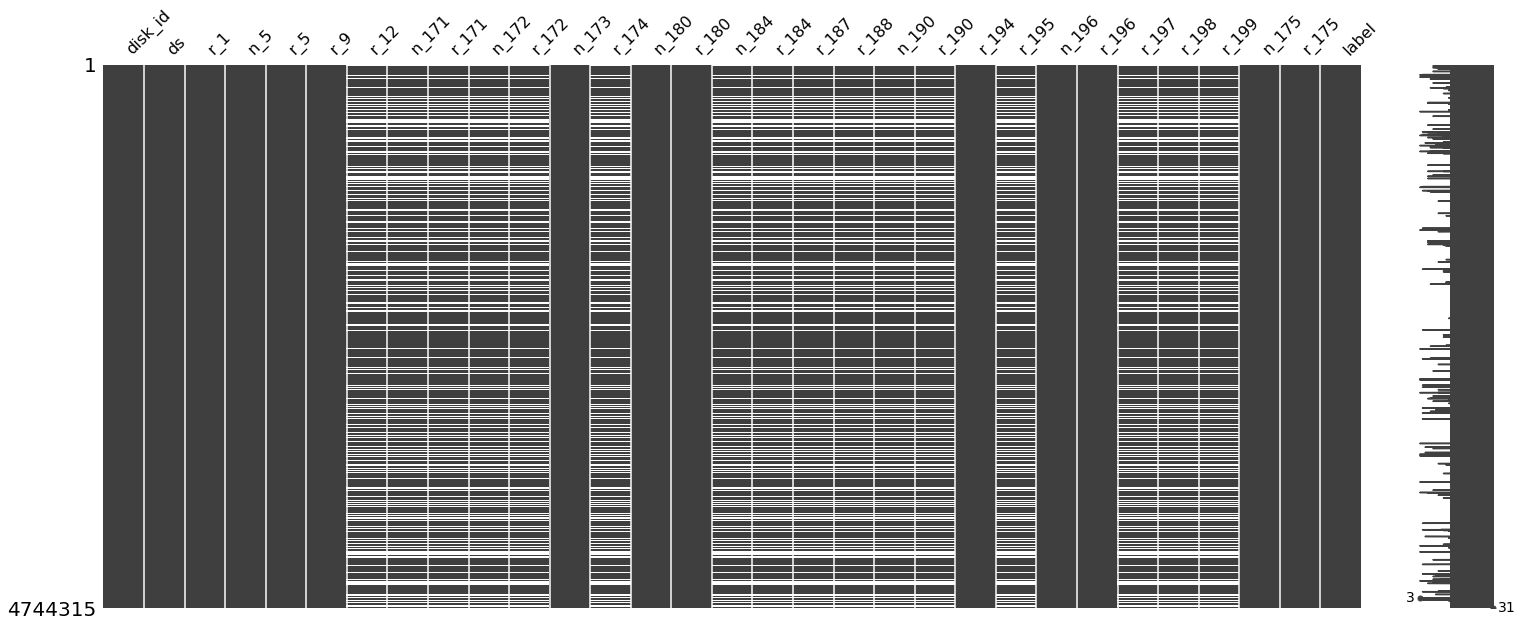

In [75]:
import missingno as msno
msno.matrix(data)

In [101]:
sorted_data = data.sort_values(by=['disk_id', 'ds'])

# 결과 출력
sorted_data

disk_id         ds           r_1   n_5  r_5      r_9  r_12  n_171  \
717975        12 2019-01-26  1.745309e+09  98.0  0.0  39291.0  60.0  100.0   
741568        12 2019-01-27  3.620582e+09  98.0  0.0  39315.0  60.0  100.0   
755075        12 2019-01-28  4.294967e+09  98.0  0.0  39339.0  60.0  100.0   
793248        12 2019-01-29  4.294967e+09  98.0  0.0  39362.0  60.0  100.0   
830717        12 2019-01-30  4.294967e+09  98.0  0.0  39386.0  60.0  100.0   
...          ...        ...           ...   ...  ...      ...   ...    ...   
4628684    43297 2019-06-26  2.706945e+09  93.0  0.0  50774.0  32.0  100.0   
4665712    43297 2019-06-27  2.731255e+09  93.0  0.0  50796.0  32.0  100.0   
4685287    43297 2019-06-28  2.756229e+09  93.0  0.0  50820.0  32.0  100.0   
4703761    43297 2019-06-29  2.781762e+09  93.0  0.0  50844.0  32.0  100.0   
4723392    43297 2019-06-30  2.807087e+09  93.0  0.0  50867.0  32.0  100.0   

         r_171  n_172  ...  r_194        r_195  n_196  r_196  r_197  r_198  \
717975     0.0  100.0  ...   12.0  428404580.0  100.0    0.0    0.0    0.0   
741568     0.0  100.0  ...   11.0  428404582.0  100.0    0.0    0.0    0.0   
755075     0.0  100.0  ...   11.0  428404583.0  100.0    0.0    0.0    0.0   
793248     0.0  100.0  ...   12.0  428404584.0  100.0    0.0    0.0    0.0   
830717     0.0  100.0  ...   11.0  428404586.0  100.0    0.0    0.0    0.0   
...        ...    ...  ...    ...          ...    ...    ...    ...    ...   
4628684    0.0  100.0  ...   17.0     517500.0  100.0    0.0    0.0    0.0   
4665712    0.0  100.0  ...   17.0     517500.0  100.0    0.0    0.0    0.0   
4685287    0.0  100.0  ...   17.0     517500.0  100.0    0.0    0.0    0.0   
4703761    0.0  100.0  ...   17.0     517500.0  100.0    0.0    0.0    0.0   
4723392    0.0  100.0  ...   17.0     517500.0  100.0    0.0    0.0    0.0   

         r_199  n_175         r_175  label  
717975     0.0  100.0  9.835897e+11      0  
741568     0.0  100.0  9.836836e+11      0  
755075     0.0  100.0  9.837775e+11      0  
793248     0.0  100.0  9.838715e+11      0  
830717     0.0  100.0  9.839654e+11      0  
...        ...    ...           ...    ...  
4628684    0.0  100.0  1.279911e+12      0  
4665712    0.0  100.0  1.279996e+12      0  
4685287    0.0  100.0  1.280090e+12      0  
4703761    0.0  100.0  1.280184e+12      0  
4723392    0.0  100.0  1.280278e+12      0  

[4744315 rows x 31 columns]

<AxesSubplot:>

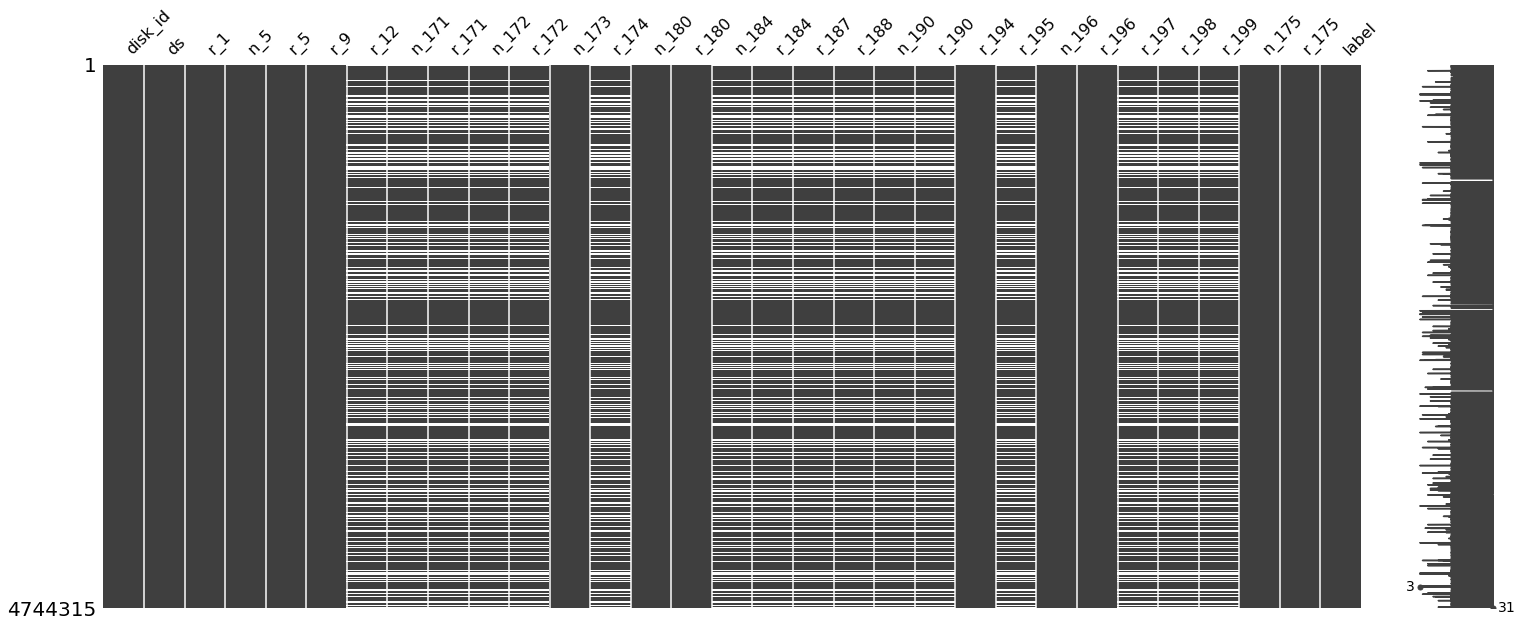

In [102]:
import missingno as msno
msno.matrix(sorted_data)

In [98]:
data

disk_id         ds           r_1   n_5  r_5      r_9  r_12  n_171  \
0          10045 2019-01-01  4.294967e+09  97.0  0.0  38288.0   NaN    NaN   
19059       3614 2019-01-01  4.294967e+09  96.0  0.0  44475.0  26.0  100.0   
19058      36107 2019-01-01  4.294967e+09  97.0  0.0  40372.0  37.0  100.0   
19057      36104 2019-01-01  4.294967e+09  98.0  0.0  40369.0  37.0  100.0   
19056        361 2019-01-01  3.276881e+09  95.0  2.0  46646.0  39.0  100.0   
...          ...        ...           ...   ...  ...      ...   ...    ...   
4728266    17784 2019-06-30  4.294967e+09  97.0  0.0  42460.0   NaN    NaN   
4728265    17781 2019-06-30  4.294967e+09  97.0  0.0  42460.0   NaN    NaN   
4728264    17715 2019-06-30  4.294967e+09  96.0  0.0  40284.0  52.0  100.0   
4728273    17929 2019-06-30  4.294967e+09  97.0  1.0  49490.0  47.0  100.0   
4744314     9974 2019-06-30  4.294967e+09  96.0  0.0  46623.0  44.0  100.0   

         r_171  n_172  ...  r_194         r_195  n_196  r_196  r_197  r_198  \
0          NaN    NaN  ...   12.0           NaN  100.0    0.0    NaN    NaN   
19059      0.0  100.0  ...   11.0  1.120414e+09  100.0    0.0    0.0    0.0   
19058      0.0  100.0  ...   16.0  8.552900e+05  100.0    0.0    0.0    0.0   
19057      0.0  100.0  ...   16.0  1.044777e+06  100.0    0.0    0.0    0.0   
19056      1.0  100.0  ...   16.0  1.091491e+06   99.0    2.0    0.0    0.0   
...        ...    ...  ...    ...           ...    ...    ...    ...    ...   
4728266    NaN    NaN  ...   16.0           NaN  100.0    0.0    NaN    NaN   
4728265    NaN    NaN  ...   15.0           NaN  100.0    0.0    NaN    NaN   
4728264    0.0  100.0  ...   14.0  8.232852e+06  100.0    0.0    0.0    0.0   
4728273    0.0  100.0  ...   14.0  4.142201e+08   99.0    1.0    0.0    0.0   
4744314    0.0  100.0  ...   14.0  3.944694e+08  100.0    0.0    0.0    0.0   

         r_199  n_175         r_175  label  
0          NaN  100.0  9.752124e+11      0  
19059      0.0  100.0  1.125649e+12      0  
19058      0.0  100.0  1.014122e+12      0  
19057      0.0  100.0  1.014122e+12      0  
19056      0.0  100.0  1.181125e+12      0  
...        ...    ...           ...    ...  
4728266    NaN  100.0  1.074284e+12      0  
4728265    NaN  100.0  1.074284e+12      0  
4728264    0.0  100.0  1.018248e+12      0  
4728273    0.0  100.0  1.241550e+12      0  
4744314    0.0  100.0  1.164486e+12      0  

[4744315 rows x 31 columns]

In [81]:
data.shape

(4744315, 31)

In [83]:
# 원하는 컬럼 리스트
desired_columns = ['r_12', 'n_171', 'r_171', 'n_172', 'r_172', 'r_174', 'n_184', 'r_184', 'r_187', 'r_188', 'n_190', 'r_190', 'r_195', 'r_197', 'r_198', 'r_199']

# 동시에 null 값을 가지는 행 개수 계산
null_counts = data[desired_columns].isnull().all(axis=1).sum()

# 결과 출력
print("동시에 null 값을 가지는 행 개수:", null_counts)

동시에 null 값을 가지는 행 개수: 1299740


In [130]:
# 원하는 컬럼 리스트
desired_columns = ['r_12', 'n_171', 'r_171', 'n_172', 'r_172', 'r_174', 'n_184', 'r_184', 'r_187', 'r_188', 'n_190', 'r_190', 'r_195', 'r_197', 'r_198', 'r_199']

# 동시에 null 값을 가지는 행 개수 계산
null_counts = data[data[desired_columns].isnull().all(axis=1)& (data['label'] == 1)]

null_counts

disk_id         ds           r_1   n_5  r_5      r_9  r_12  n_171  \
464927     24128 2019-01-17  4.294967e+09  97.0  0.0  16150.0   NaN    NaN   
467457     24135 2019-01-17  4.294967e+09  97.0  0.0  16636.0   NaN    NaN   
467279     18418 2019-01-17  4.294967e+09  97.0  0.0  17903.0   NaN    NaN   
466153     24133 2019-01-17  4.294967e+09  97.0  0.0  16785.0   NaN    NaN   
466237     26336 2019-01-17  4.294967e+09  96.0  8.0  38334.0   NaN    NaN   
466518     34755 2019-01-17  4.294967e+09  96.0  0.0  18130.0   NaN    NaN   
471498     30302 2019-01-17  4.294967e+09  97.0  0.0  13763.0   NaN    NaN   
472890     34748 2019-01-17  4.294967e+09  97.0  0.0  11465.0   NaN    NaN   
473583      1664 2019-01-17  4.294967e+09  97.0  0.0  19381.0   NaN    NaN   
468504     18415 2019-01-17  4.294967e+09  97.0  0.0  17808.0   NaN    NaN   
469776      1668 2019-01-17  4.294967e+09  97.0  0.0   8803.0   NaN    NaN   
450934     26331 2019-01-17  4.294967e+09  97.0  0.0  38336.0   NaN    NaN   
453457     24138 2019-01-17  4.294967e+09  97.0  0.0  16757.0   NaN    NaN   
453266     18416 2019-01-17  4.294967e+09  97.0  0.0  15986.0   NaN    NaN   
452287     26334 2019-01-17  4.294967e+09  96.0  0.0  38335.0   NaN    NaN   
449666     26333 2019-01-17  4.294967e+09  97.0  0.0  38336.0   NaN    NaN   
457550     30309 2019-01-17  4.294967e+09  97.0  0.0  13306.0   NaN    NaN   
456078     24129 2019-01-17  4.294967e+09  97.0  0.0  16613.0   NaN    NaN   
456154     26337 2019-01-17  4.294967e+09  96.0  0.0  38336.0   NaN    NaN   
455828      1674 2019-01-17  4.294967e+09  96.0  0.0   9403.0   NaN    NaN   
531466     19645 2019-01-20  4.294967e+09  97.0  0.0  33529.0   NaN    NaN   
543030     19647 2019-01-20  4.294967e+09  96.0  0.0  38510.0   NaN    NaN   
539165     19640 2019-01-20  4.294967e+09  96.0  0.0  38510.0   NaN    NaN   
687238     16523 2019-01-25  4.294967e+09  97.0  0.0  38819.0   NaN    NaN   
813998     33606 2019-01-30  4.294967e+09  97.0  0.0  25316.0   NaN    NaN   
961502     18396 2019-02-04  4.294967e+09  97.0  0.0  39077.0   NaN    NaN   
1027894    28724 2019-02-06  4.294967e+09  97.0  0.0  39182.0   NaN    NaN   
1286674    12032 2019-02-16  4.294967e+09  97.0  0.0  39420.0   NaN    NaN   
1390450    37852 2019-02-19  4.294967e+09  97.0  0.0  29210.0   NaN    NaN   
1607762    33609 2019-02-27  4.294967e+09  97.0  0.0  25867.0   NaN    NaN   
1621336     1156 2019-02-28  4.294967e+09  98.0  0.0  40012.0   NaN    NaN   
2314006    37599 2019-03-23  4.294967e+09  97.0  1.0  31151.0   NaN    NaN   
2391121    23364 2019-03-26  4.294967e+09  97.0  0.0  21402.0   NaN    NaN   
2813902    41492 2019-04-10  4.294967e+09  96.0  2.0  11583.0   NaN    NaN   
2788487    28721 2019-04-10  4.294967e+09  98.0  0.0  40692.0   NaN    NaN   
2855874     7975 2019-04-12  4.294967e+09  97.0  3.0  39974.0   NaN    NaN   
2876882     7972 2019-04-13  4.294967e+09  97.0  0.0  39999.0   NaN    NaN   
2887534     7983 2019-04-13  4.294967e+09  97.0  0.0  39970.0   NaN    NaN   
3101585    36331 2019-04-22  4.294967e+09  98.0  0.0  41171.0   NaN    NaN   
3161511    27309 2019-04-25  4.294967e+09  96.0  0.0  40255.0   NaN    NaN   
3288975    27302 2019-04-30  4.294967e+09  97.0  2.0  40371.0   NaN    NaN   
3526764    42030 2019-05-09  4.294967e+09  98.0  0.0  39056.0   NaN    NaN   
3669797    26339 2019-05-15  4.294967e+09  96.0  0.0  41153.0   NaN    NaN   
3697389    12036 2019-05-16  4.294967e+09  97.0  1.0  41550.0   NaN    NaN   
3896011     9875 2019-05-24  4.294967e+09  98.0  0.0  40552.0   NaN    NaN   
4059014     7978 2019-05-31  4.294967e+09  98.0  0.0  41145.0   NaN    NaN   

         r_171  n_172  r_172  n_173  r_174  n_180         r_180  n_184  r_184  \
464927     NaN    NaN    NaN   24.0    NaN  130.0  4.294967e+09    NaN    NaN   
467457     NaN    NaN    NaN    1.0    NaN  130.0  4.294967e+09    NaN    NaN   
467279     NaN    NaN    NaN    1.0    NaN  130.0  4.294967e+09    NaN    NaN   
466153     NaN    

In [84]:
# 원하는 컬럼 리스트
desired_columns = ['r_12', 'n_171', 'r_171', 'n_172', 'r_172', 'r_174', 'n_184', 'r_184', 'r_187', 'r_188', 'n_190', 'r_190', 'r_195', 'r_197', 'r_198', 'r_199']

# 동시에 null 값을 가지는 행 선택
null_rows = data[data[desired_columns].isnull().all(axis=1)]

# 결과 출력
null_rows

disk_id         ds           r_1   n_5  r_5      r_9  r_12  n_171  \
0          10045 2019-01-01  4.294967e+09  97.0  0.0  38288.0   NaN    NaN   
19050      36020 2019-01-01  4.294967e+09  96.0  1.0  38931.0   NaN    NaN   
19049      36017 2019-01-01  4.294967e+09  98.0  0.0  38935.0   NaN    NaN   
19045      35896 2019-01-01  4.294967e+09  98.0  0.0  38922.0   NaN    NaN   
19044      35891 2019-01-01  4.294967e+09  97.0  0.0  38066.0   NaN    NaN   
...          ...        ...           ...   ...  ...      ...   ...    ...   
4728243    17199 2019-06-30  4.294967e+09  96.0  0.0  41993.0   NaN    NaN   
4728280    18274 2019-06-30  4.294967e+09  96.0  0.0  41231.0   NaN    NaN   
4728279    18273 2019-06-30  4.294967e+09  97.0  0.0  41226.0   NaN    NaN   
4728266    17784 2019-06-30  4.294967e+09  97.0  0.0  42460.0   NaN    NaN   
4728265    17781 2019-06-30  4.294967e+09  97.0  0.0  42460.0   NaN    NaN   

         r_171  n_172  ...  r_194  r_195  n_196  r_196  r_197  r_198  r_199  \
0          NaN    NaN  ...   12.0    NaN  100.0    0.0    NaN    NaN    NaN   
19050      NaN    NaN  ...   12.0    NaN   99.0    1.0    NaN    NaN    NaN   
19049      NaN    NaN  ...   12.0    NaN  100.0    0.0    NaN    NaN    NaN   
19045      NaN    NaN  ...   11.0    NaN  100.0    0.0    NaN    NaN    NaN   
19044      NaN    NaN  ...   15.0    NaN  100.0    0.0    NaN    NaN    NaN   
...        ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
4728243    NaN    NaN  ...   15.0    NaN  100.0    0.0    NaN    NaN    NaN   
4728280    NaN    NaN  ...   13.0    NaN  100.0    0.0    NaN    NaN    NaN   
4728279    NaN    NaN  ...   15.0    NaN  100.0    0.0    NaN    NaN    NaN   
4728266    NaN    NaN  ...   16.0    NaN  100.0    0.0    NaN    NaN    NaN   
4728265    NaN    NaN  ...   15.0    NaN  100.0    0.0    NaN    NaN    NaN   

         n_175         r_175  label  
0        100.0  9.752124e+11      0  
19050    100.0  9.839107e+11      0  
19049    100.0  9.839124e+11      0  
19045    100.0  9.881171e+11      0  
19044    100.0  9.624599e+11      0  
...        ...           ...    ...  
4728243  100.0  1.022609e+12      0  
4728280  100.0  1.052634e+12      0  
4728279  100.0  1.052614e+12      0  
4728266  100.0  1.074284e+12      0  
4728265  100.0  1.074284e+12      0  

[1299740 rows x 31 columns]

In [85]:
# 원하는 컬럼 리스트
desired_columns = ['r_12', 'n_171', 'r_171', 'n_172', 'r_172', 'r_174', 'n_184', 'r_184', 'r_187', 'r_188', 'n_190', 'r_190', 'r_195', 'r_197', 'r_198', 'r_199']

# 하나 이상의 컬럼에 null 값을 가지지 않는 행 선택
non_null_rows = data[data[desired_columns].notnull().any(axis=1)]

# 결과 출력
non_null_rows

disk_id         ds           r_1   n_5  r_5      r_9  r_12  n_171  \
19059       3614 2019-01-01  4.294967e+09  96.0  0.0  44475.0  26.0  100.0   
19058      36107 2019-01-01  4.294967e+09  97.0  0.0  40372.0  37.0  100.0   
19057      36104 2019-01-01  4.294967e+09  98.0  0.0  40369.0  37.0  100.0   
19056        361 2019-01-01  3.276881e+09  95.0  2.0  46646.0  39.0  100.0   
19055      36082 2019-01-01  4.294967e+09  98.0  0.0  37598.0  40.0  100.0   
...          ...        ...           ...   ...  ...      ...   ...    ...   
4728268    17792 2019-06-30  4.294967e+09  98.0  0.0  43118.0  31.0  100.0   
4728267     1779 2019-06-30  4.294967e+09  98.0  0.0  45020.0  29.0  100.0   
4728264    17715 2019-06-30  4.294967e+09  96.0  0.0  40284.0  52.0  100.0   
4728273    17929 2019-06-30  4.294967e+09  97.0  1.0  49490.0  47.0  100.0   
4744314     9974 2019-06-30  4.294967e+09  96.0  0.0  46623.0  44.0  100.0   

         r_171  n_172  ...  r_194         r_195  n_196  r_196  r_197  r_198  \
19059      0.0  100.0  ...   11.0  1.120414e+09  100.0    0.0    0.0    0.0   
19058      0.0  100.0  ...   16.0  8.552900e+05  100.0    0.0    0.0    0.0   
19057      0.0  100.0  ...   16.0  1.044777e+06  100.0    0.0    0.0    0.0   
19056      1.0  100.0  ...   16.0  1.091491e+06   99.0    2.0    0.0    0.0   
19055      0.0  100.0  ...   19.0  1.006528e+07  100.0    0.0    0.0    0.0   
...        ...    ...  ...    ...           ...    ...    ...    ...    ...   
4728268    0.0  100.0  ...   14.0  1.018570e+05  100.0    0.0    0.0    0.0   
4728267    0.0  100.0  ...   15.0  1.886397e+07  100.0    0.0    0.0    0.0   
4728264    0.0  100.0  ...   14.0  8.232852e+06  100.0    0.0    0.0    0.0   
4728273    0.0  100.0  ...   14.0  4.142201e+08   99.0    1.0    0.0    0.0   
4744314    0.0  100.0  ...   14.0  3.944694e+08  100.0    0.0    0.0    0.0   

         r_199  n_175         r_175  label  
19059      0.0  100.0  1.125649e+12      0  
19058      0.0  100.0  1.014122e+12      0  
19057      0.0  100.0  1.014122e+12      0  
19056      0.0  100.0  1.181125e+12      0  
19055      0.0  100.0  9.455094e+11      0  
...        ...    ...           ...    ...  
4728268    0.0  100.0  1.099828e+12      0  
4728267    0.0  100.0  1.143073e+12      0  
4728264    0.0  100.0  1.018248e+12      0  
4728273    0.0  100.0  1.241550e+12      0  
4744314    0.0  100.0  1.164486e+12      0  

[3444575 rows x 31 columns]

In [87]:
# 원하는 컬럼 리스트
desired_columns = ['r_12', 'n_171', 'r_171', 'n_172', 'r_172', 'r_174', 'n_184', 'r_184', 'r_187', 'r_188', 'n_190', 'r_190', 'r_195', 'r_197', 'r_198', 'r_199']

# 하나 이상의 컬럼에 null 값을 가지지 않고, label이 1인 행 선택
filtered_rows = data[data[desired_columns].notnull().any(axis=1) & (data['label'] == 1)]

# 결과 출력
filtered_rows

disk_id         ds           r_1   n_5    r_5      r_9  r_12  n_171  \
55936      23729 2019-01-02  4.294967e+09  98.0    2.0  40175.0  28.0  100.0   
55019       3401 2019-01-02  4.294967e+09  98.0    0.0  40012.0  59.0  100.0   
75070      30146 2019-01-03  4.294967e+09  98.0    0.0  36922.0  30.0  100.0   
70405      41793 2019-01-03  4.294967e+09  98.0    0.0  36522.0  28.0  100.0   
106266     37927 2019-01-04  4.294967e+09  94.0  141.0  37481.0  30.0   99.0   
...          ...        ...           ...   ...    ...      ...   ...    ...   
4112479     4402 2019-06-03  4.294967e+09  98.0    3.0  41148.0  34.0  100.0   
4178901    34874 2019-06-05  4.294967e+09  98.0    0.0  40585.0  28.0  100.0   
4175174     1230 2019-06-05  4.294967e+09  98.0    0.0  44244.0  27.0  100.0   
4195779    38773 2019-06-06  4.294967e+09  98.0    2.0  44298.0  37.0  100.0   
4182969    31327 2019-06-06  4.294967e+09  98.0    0.0  42078.0  44.0  100.0   

         r_171  n_172  ...  r_194         r_195  n_196  r_196  r_197  r_198  \
55936      4.0  100.0  ...   20.0  1.067805e+09   99.0    2.0    0.0    0.0   
55019      0.0  100.0  ...   16.0  2.260676e+09  100.0    0.0    0.0    0.0   
75070      0.0  100.0  ...   18.0  1.591232e+09  100.0    0.0    0.0    0.0   
70405      0.0  100.0  ...   14.0  2.791970e+08  100.0    0.0    0.0    0.0   
106266    70.0  100.0  ...    8.0  2.748596e+09   97.0  141.0    0.0    0.0   
...        ...    ...  ...    ...           ...    ...    ...    ...    ...   
4112479    1.0  100.0  ...   15.0  4.670091e+08   99.0    3.0    0.0    0.0   
4178901    0.0  100.0  ...   15.0  1.579518e+09  100.0    0.0    0.0    0.0   
4175174    0.0  100.0  ...   19.0  2.581993e+09  100.0    0.0    0.0    0.0   
4195779    2.0  100.0  ...   16.0  1.970826e+09   99.0    2.0    0.0    0.0   
4182969    0.0  100.0  ...   17.0  3.873290e+09  100.0    0.0    0.0    0.0   

         r_199  n_175         r_175  label  
55936      0.0  100.0  1.018337e+12      1  
55019      0.0  100.0  1.005077e+12      1  
75070      0.0  100.0  9.407059e+11      1  
70405      0.0  100.0  9.280304e+11      1  
106266     0.0  100.0  9.497040e+11      1  
...        ...    ...           ...    ...  
4112479    0.0  100.0  1.039979e+12      1  
4178901    0.0  100.0  1.035432e+12      1  
4175174    0.0  100.0  1.125316e+12      1  
4195779    0.0  100.0  1.121018e+12      1  
4182969    0.0  100.0  1.057160e+12      1  

[229 rows x 31 columns]

In [88]:
# 원하는 컬럼 리스트
desired_columns = ['r_12', 'n_171', 'r_171', 'n_172', 'r_172', 'r_174', 'n_184', 'r_184', 'r_187', 'r_188', 'n_190', 'r_190', 'r_195', 'r_197', 'r_198', 'r_199']

# 동시에 null 값을 가지는 행 선택
null_rows = data[data[desired_columns].isnull().all(axis=1)]

# 결과 출력
null_rows

disk_id         ds           r_1   n_5  r_5      r_9  r_12  n_171  \
0          10045 2019-01-01  4.294967e+09  97.0  0.0  38288.0   NaN    NaN   
19050      36020 2019-01-01  4.294967e+09  96.0  1.0  38931.0   NaN    NaN   
19049      36017 2019-01-01  4.294967e+09  98.0  0.0  38935.0   NaN    NaN   
19045      35896 2019-01-01  4.294967e+09  98.0  0.0  38922.0   NaN    NaN   
19044      35891 2019-01-01  4.294967e+09  97.0  0.0  38066.0   NaN    NaN   
...          ...        ...           ...   ...  ...      ...   ...    ...   
4728243    17199 2019-06-30  4.294967e+09  96.0  0.0  41993.0   NaN    NaN   
4728280    18274 2019-06-30  4.294967e+09  96.0  0.0  41231.0   NaN    NaN   
4728279    18273 2019-06-30  4.294967e+09  97.0  0.0  41226.0   NaN    NaN   
4728266    17784 2019-06-30  4.294967e+09  97.0  0.0  42460.0   NaN    NaN   
4728265    17781 2019-06-30  4.294967e+09  97.0  0.0  42460.0   NaN    NaN   

         r_171  n_172  ...  r_194  r_195  n_196  r_196  r_197  r_198  r_199  \
0          NaN    NaN  ...   12.0    NaN  100.0    0.0    NaN    NaN    NaN   
19050      NaN    NaN  ...   12.0    NaN   99.0    1.0    NaN    NaN    NaN   
19049      NaN    NaN  ...   12.0    NaN  100.0    0.0    NaN    NaN    NaN   
19045      NaN    NaN  ...   11.0    NaN  100.0    0.0    NaN    NaN    NaN   
19044      NaN    NaN  ...   15.0    NaN  100.0    0.0    NaN    NaN    NaN   
...        ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
4728243    NaN    NaN  ...   15.0    NaN  100.0    0.0    NaN    NaN    NaN   
4728280    NaN    NaN  ...   13.0    NaN  100.0    0.0    NaN    NaN    NaN   
4728279    NaN    NaN  ...   15.0    NaN  100.0    0.0    NaN    NaN    NaN   
4728266    NaN    NaN  ...   16.0    NaN  100.0    0.0    NaN    NaN    NaN   
4728265    NaN    NaN  ...   15.0    NaN  100.0    0.0    NaN    NaN    NaN   

         n_175         r_175  label  
0        100.0  9.752124e+11      0  
19050    100.0  9.839107e+11      0  
19049    100.0  9.839124e+11      0  
19045    100.0  9.881171e+11      0  
19044    100.0  9.624599e+11      0  
...        ...           ...    ...  
4728243  100.0  1.022609e+12      0  
4728280  100.0  1.052634e+12      0  
4728279  100.0  1.052614e+12      0  
4728266  100.0  1.074284e+12      0  
4728265  100.0  1.074284e+12      0  

[1299740 rows x 31 columns]

In [132]:
# 중복되는 disk_id 값들과 중복 횟수 확인
duplicate_counts = null_rows['disk_id'].value_counts()

# 중복되는 disk_id 값과 중복 횟수 출력
print("중복되는 disk_id 값들과 중복 횟수:")
duplicate_counts

중복되는 disk_id 값들과 중복 횟수:


disk_id
3101     180
25554    180
21761    180
7593     180
15226    180
        ... 
33946      1
2839       1
2319       1
9241       1
10982      1
Name: count, Length: 8804, dtype: int64

In [139]:
# 중복되는 disk_id 값들과 중복 횟수 확인
duplicate_counts = null_rows['disk_id'].value_counts()

# 빈도가 180인 값들 선택
values_with_frequency_180 = duplicate_counts[duplicate_counts == 1]

# 결과 출력
print("빈도가 180인 값들:")
print(values_with_frequency_180)

빈도가 180인 값들:
disk_id
40589    1
32720    1
32027    1
35183    1
23105    1
26363    1
37261    1
24726    1
19821    1
27419    1
27428    1
27422    1
36745    1
8224     1
40484    1
21225    1
7579     1
6006     1
19830    1
26655    1
19523    1
3985     1
41450    1
19682    1
31612    1
10659    1
2974     1
7730     1
15435    1
23574    1
38099    1
41525    1
20259    1
42159    1
4863     1
30221    1
2352     1
28589    1
10708    1
18358    1
29579    1
33946    1
2839     1
2319     1
9241     1
10982    1
Name: count, dtype: int64


In [140]:
# 중복되는 disk_id 값들과 중복 횟수 확인
duplicate_counts = null_rows['disk_id'].value_counts()

# 빈도가 180인 값들 선택
values_with_frequency_180 = duplicate_counts[duplicate_counts == 1]

# 빈도가 180인 값들의 개수
count_values_with_frequency_180 = len(values_with_frequency_180)

# 결과 출력
print("빈도가 180인 값들의 개수:", count_values_with_frequency_180)

빈도가 180인 값들의 개수: 46


In [103]:
missing_values_per_disk = data.groupby('disk_id').apply(lambda x: x.isnull().sum())

In [104]:
missing_values_per_disk

disk_id  ds  r_1  n_5  r_5  r_9  r_12  n_171  r_171  n_172  ...  \
disk_id                                                              ...   
12             0   0    0    0    0    0     0      0      0      0  ...   
13             0   0    0    0    0    0     0      0      0      0  ...   
14             0   0    0    0    0    0     0      0      0      0  ...   
15             0   0    0    0    0    0     0      0      0      0  ...   
16             0   0    0    0    0    0     0      0      0      0  ...   
...          ...  ..  ...  ...  ...  ...   ...    ...    ...    ...  ...   
43293          0   0    0    0    0    0     0      0      0      0  ...   
43294          0   0    0    0    0    0     0      0      0      0  ...   
43295          0   0    0    0    0    0     0      0      0      0  ...   
43296          0   0    0    0    0    0     0      0      0      0  ...   
43297          0   0    0    0    0    0     0      0      0      0  ...   

         r_194  r_195  n_196  r_196  r_197  r_198  r_199  n_175  r_175  label  
disk_id                                                                        
12           0      0      0      0      0      0      0      0      0      0  
13           0      0      0      0      0      0      0      0      0      0  
14           0      0      0      0      0      0      0      0      0      0  
15           0      0      0      0      0      0      0      0      0      0  
16           0      0      0      0      0      0      0      0      0      0  
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
43293        0      0      0      0      0      0      0      0      0      0  
43294        0      0      0      0      0      0      0      0      0      0  
43295        0      0      0      0      0      0      0      0      0      0  
43296        0      0      0      0      0      0      0      0      0      0  
43297        0      0      0      0      0      0      0      0      0      0  

[33990 rows x 31 columns]

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

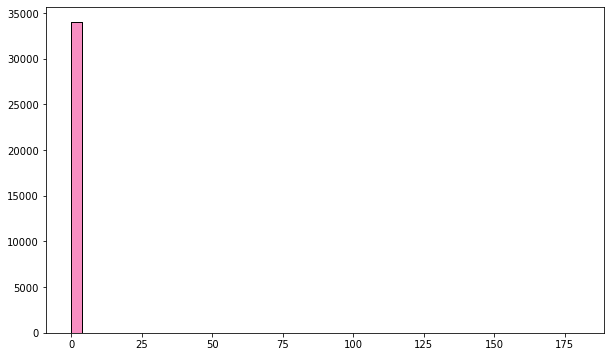

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(missing_values_per_disk, bins=50, kde=True)
plt.show()

In [106]:
missing_values_per_disk.describe()

disk_id       ds           r_1           n_5           r_5  \
count  33990.0  33990.0  33990.000000  33990.000000  33990.000000   
mean       0.0      0.0      0.005355      0.005296      0.005296   
std        0.0      0.0      0.072979      0.072580      0.072580   
min        0.0      0.0      0.000000      0.000000      0.000000   
25%        0.0      0.0      0.000000      0.000000      0.000000   
50%        0.0      0.0      0.000000      0.000000      0.000000   
75%        0.0      0.0      0.000000      0.000000      0.000000   
max        0.0      0.0      1.000000      1.000000      1.000000   

                r_9          r_12         n_171         r_171         n_172  \
count  33990.000000  33990.000000  33990.000000  33990.000000  33990.000000   
mean       0.005237     38.242424     38.242012     38.242012     38.242042   
std        0.072584     68.311150     68.311377     68.311377     68.311361   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000     48.000000     48.000000     48.000000     48.000000   
max        2.000000    180.000000    180.000000    180.000000    180.000000   

       ...         r_194         r_195         n_196         r_196  \
count  ...  33990.000000  33990.000000  33990.000000  33990.000000   
mean   ...      0.005355     38.242307      0.005619      0.005619   
std    ...      0.072979     68.311215      0.075145      0.075145   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000     48.000000      0.000000      0.000000   
max    ...      1.000000    180.000000      2.000000      2.000000   

              r_197         r_198         r_199         n_175         r_175  \
count  33990.000000  33990.000000  33990.000000  33990.000000  33990.000000   
mean      38.242483     38.242483     38.242601      0.005296      0.005296   
std       68.311117     68.311117     68.311052      0.072580      0.072580   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%       48.000000     48.000000     48.000000      0.000000      0.000000   
max      180.000000    180.000000    180.000000      1.000000      1.000000   

         label  
count  33990.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

[8 rows x 31 columns]

In [107]:
# 원하는 컬럼들이 모두 null인 행만 필터링
null_rows = data[data[desired_columns].isnull().all(axis=1)]

# 'disk_id'와 'ds'로 그룹화
grouped = null_rows.groupby(['disk_id', 'ds']).size()

# 각 'disk_id'별로 결과를 확인
for disk_id, group in grouped.groupby(level=0):
    print(f'Disk ID: {disk_id}')
    print(group)

Disk ID: 24
disk_id  ds        
24       2019-01-01    1
         2019-01-02    1
         2019-01-03    1
         2019-01-04    1
         2019-01-05    1
                      ..
         2019-06-26    1
         2019-06-27    1
         2019-06-28    1
         2019-06-29    1
         2019-06-30    1
Length: 180, dtype: int64
Disk ID: 25
disk_id  ds        
25       2019-01-01    1
         2019-01-02    1
         2019-01-03    1
         2019-01-04    1
         2019-01-05    1
                      ..
         2019-06-26    1
         2019-06-27    1
         2019-06-28    1
         2019-06-29    1
         2019-06-30    1
Length: 180, dtype: int64
Disk ID: 26
disk_id  ds        
26       2019-01-01    1
         2019-01-02    1
         2019-01-03    1
         2019-01-04    1
         2019-01-05    1
                      ..
         2019-06-26    1
         2019-06-27    1
         2019-06-28    1
         2019-06-29    1
         2019-06-30    1
Length: 180, dtype: int64
D

In [108]:
desired_columns

['r_12',
 'n_171',
 'r_171',
 'n_172',
 'r_172',
 'r_174',
 'n_184',
 'r_184',
 'r_187',
 'r_188',
 'n_190',
 'r_190',
 'r_195',
 'r_197',
 'r_198',
 'r_199']

In [110]:
unique_disk_ids = data['disk_id'].nunique()
print("disk_id의 고유 개수:", unique_disk_ids)

disk_id의 고유 개수: 33990


In [124]:
rows_with_missing_r1 = data[data['r_1'].isnull()]
rows_with_missing_r1[:100]

disk_id         ds  r_1   n_5  r_5      r_9  r_12  n_171  r_171  \
21853      42362 2019-01-01  NaN   NaN  NaN      NaN  27.0  100.0    0.0   
3107       23214 2019-01-01  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
2446       42366 2019-01-01  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
11578      42368 2019-01-01  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
13169      11673 2019-01-01  NaN  98.0  0.0  36225.0  37.0  100.0    0.0   
8240       20755 2019-01-01  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
46943      22183 2019-01-02  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
36305       1144 2019-01-02  NaN   NaN  NaN      NaN  53.0  100.0    0.0   
102934     10518 2019-01-04  NaN   NaN  NaN  40571.0  31.0  100.0    0.0   
99540      19821 2019-01-04  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
98215      17885 2019-01-04  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
89646      19827 2019-01-04  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
86004      19822 2019-01-04  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
84718      19829 2019-01-04  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
96978      19830 2019-01-04  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
137764     29758 2019-01-05  NaN   NaN  NaN  45661.0  33.0  100.0    0.0   
137763     29752 2019-01-05  NaN  97.0  0.0  45867.0  68.0  100.0    0.0   
132707     29761 2019-01-05  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
116504      4037 2019-01-05  NaN   NaN  NaN      NaN  27.0  100.0    0.0   
150431     25110 2019-01-06  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
212294     28283 2019-01-08  NaN  96.0  0.0  38789.0   NaN    NaN    NaN   
219541     21152 2019-01-08  NaN   NaN  NaN  39021.0   NaN    NaN    NaN   
241359     21740 2019-01-09  NaN  96.0  0.0  38297.0   NaN    NaN    NaN   
269354     26964 2019-01-10  NaN   NaN  NaN  38954.0   NaN    NaN    NaN   
268770      8485 2019-01-10  NaN   NaN  NaN      NaN   NaN  100.0    0.0   
275328     16060 2019-01-10  NaN   NaN  NaN      NaN   NaN  100.0    0.0   
254660     40426 2019-01-10  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
300704     15938 2019-01-11  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
290928     30791 2019-01-11  NaN   NaN  NaN  40987.0  37.0  100.0    0.0   
319390     39802 2019-01-12  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
316922       473 2019-01-12  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
361328     12273 2019-01-13  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
336506     22958 2019-01-13  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
390158      2823 2019-01-14  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
366512     14978 2019-01-14  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
410831     28194 2019-01-15  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
392387     19523 2019-01-15  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
466467     33131 2019-01-17  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
511838     28910 2019-01-19  NaN   NaN  NaN      NaN   NaN  100.0    0.0   
552524     33567 2019-01-20  NaN   NaN  NaN      NaN   NaN  100.0    0.0   
577951     25807 2019-01-21  NaN   NaN  NaN      NaN   NaN  100.0    2.0   
566457     30760 2019-01-21  NaN   NaN  NaN      NaN   NaN  100.0    0.0   
567716     30754 2019-01-21  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
605652     30661 2019-01-22  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
612428      8452 2019-01-22  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
607013     35369 2019-01-22  NaN   NaN  NaN  39446.0   NaN    NaN    NaN   
632987     28455 2019-01-23  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
628524     41450 2019-01-23  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
639547      3988 2019-01-23  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
637424     11445 2019-01-23  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
618556      3989 2019-01-23  NaN   NaN  NaN      NaN   NaN    NaN    NaN   
616058      3980 2019-01-23  NaN   NaN  NaN      NaN   Na

In [138]:
# 중복되는 disk_id 값들과 중복 횟수 확인
duplicate_counts = null_rows['disk_id'].value_counts()

# 중복되는 disk_id 값과 중복 횟수 출력
print("중복되는 disk_id 값들과 중복 횟수:")
duplicate_counts

중복되는 disk_id 값들과 중복 횟수:


disk_id
3101     180
25554    180
21761    180
7593     180
15226    180
        ... 
33946      1
2839       1
2319       1
9241       1
10982      1
Name: count, Length: 8804, dtype: int64

In [143]:
for disk_id, count in duplicate_counts.items():
    print("disk_id:", disk_id, "- 중복 횟수:", count)

disk_id: 3101 - 중복 횟수: 180
disk_id: 25554 - 중복 횟수: 180
disk_id: 21761 - 중복 횟수: 180
disk_id: 7593 - 중복 횟수: 180
disk_id: 15226 - 중복 횟수: 180
disk_id: 26342 - 중복 횟수: 180
disk_id: 27842 - 중복 횟수: 180
disk_id: 27837 - 중복 횟수: 180
disk_id: 14860 - 중복 횟수: 180
disk_id: 26976 - 중복 횟수: 180
disk_id: 34946 - 중복 횟수: 180
disk_id: 25114 - 중복 횟수: 180
disk_id: 29059 - 중복 횟수: 180
disk_id: 29060 - 중복 횟수: 180
disk_id: 24634 - 중복 횟수: 180
disk_id: 24369 - 중복 횟수: 180
disk_id: 31654 - 중복 횟수: 180
disk_id: 31881 - 중복 횟수: 180
disk_id: 3520 - 중복 횟수: 180
disk_id: 25230 - 중복 횟수: 180
disk_id: 25563 - 중복 횟수: 180
disk_id: 21499 - 중복 횟수: 180
disk_id: 21501 - 중복 횟수: 180
disk_id: 29868 - 중복 횟수: 180
disk_id: 22369 - 중복 횟수: 180
disk_id: 14281 - 중복 횟수: 180
disk_id: 22642 - 중복 횟수: 180
disk_id: 35656 - 중복 횟수: 180
disk_id: 23854 - 중복 횟수: 180
disk_id: 23426 - 중복 횟수: 180
disk_id: 3572 - 중복 횟수: 180
disk_id: 14184 - 중복 횟수: 180
disk_id: 4250 - 중복 횟수: 180
disk_id: 42715 - 중복 횟수: 180
disk_id: 21883 - 중복 횟수: 180
disk_id: 42744 - 중복 횟수: 1

In [164]:
data[data['disk_id']==10659]

disk_id         ds           r_1   n_5  r_5      r_9  r_12  n_171  \
4019       10659 2019-01-01  4.294967e+09  98.0  0.0  40517.0  44.0  100.0   
45202      10659 2019-01-02  4.294967e+09  98.0  0.0  40541.0  44.0  100.0   
74436      10659 2019-01-03  4.294967e+09  98.0  0.0  40565.0  44.0  100.0   
109082     10659 2019-01-04  4.294967e+09  98.0  0.0  40589.0  44.0  100.0   
119353     10659 2019-01-05  4.294967e+09  98.0  0.0  40612.0  44.0  100.0   
...          ...        ...           ...   ...  ...      ...   ...    ...   
4628869    10659 2019-06-26  4.294967e+09  98.0  0.0  44727.0  44.0  100.0   
4662718    10659 2019-06-27  4.294967e+09  98.0  0.0  44751.0  44.0  100.0   
4691885    10659 2019-06-28  4.294967e+09  98.0  0.0  44775.0  44.0  100.0   
4707279    10659 2019-06-29  4.294967e+09  98.0  0.0  44799.0  44.0  100.0   
4730255    10659 2019-06-30  4.294967e+09  98.0  0.0  44823.0  44.0  100.0   

         r_171  n_172  r_172  n_173  r_174  n_180         r_180  n_184  r_184  \
4019       0.0  100.0    0.0   88.0   42.0  130.0  4.294967e+09  100.0    0.0   
45202      0.0  100.0    0.0   88.0   42.0  130.0  4.294967e+09  100.0    0.0   
74436      0.0  100.0    0.0   88.0   42.0  130.0  4.294967e+09  100.0    0.0   
109082     0.0  100.0    0.0   88.0   42.0  130.0  4.294967e+09  100.0    0.0   
119353     0.0  100.0    0.0   88.0   42.0  130.0  4.294967e+09  100.0    0.0   
...        ...    ...    ...    ...    ...    ...           ...    ...    ...   
4628869    0.0  100.0    0.0   80.0   42.0  130.0  4.294967e+09  100.0    0.0   
4662718    0.0  100.0    0.0   80.0   42.0  130.0  4.294967e+09  100.0    0.0   
4691885    0.0  100.0    0.0   80.0   42.0  130.0  4.294967e+09  100.0    0.0   
4707279    0.0  100.0    0.0   80.0   42.0  130.0  4.294967e+09  100.0    0.0   
4730255    0.0  100.0    0.0   80.0   42.0  130.0  4.294967e+09  100.0    0.0   

         r_187  r_188  n_190  r_190  r_194        r_195  n_196  r_196  r_197  \
4019       0.0    0.0   86.0   14.0   14.0  220097443.0  100.0    0.0    0.0   
45202      0.0    0.0   86.0   14.0   14.0  220387271.0  100.0    0.0    0.0   
74436      0.0    0.0   86.0   14.0   14.0  220643194.0  100.0    0.0    0.0   
109082     0.0    0.0   86.0   14.0   14.0  220889626.0  100.0    0.0    0.0   
119353     0.0    0.0   86.0   14.0   14.0  221133417.0  100.0    0.0    0.0   
...        ...    ...    ...    ...    ...          ...    ...    ...    ...   
4628869    0.0    0.0   85.0   15.0   15.0  375604789.0  100.0    0.0    0.0   
4662718    0.0    0.0   85.0   15.0   15.0  376342191.0  100.0    0.0    0.0   
4691885    0.0    0.0   86.0   14.0   14.0  377430462.0  100.0    0.0    0.0   
4707279    0.0    0.0   86.0   14.0   14.0  378505546.0  100.0    0.0    0.0   
4730255    0.0    0.0   86.0   14.0   14.0  379580344.0  100.0    0.0    0.0   

         r_198  r_199  n_175         r_175  label  
4019       0.0    0.0  100.0  1.026602e+12      0  
45202      0.0    0.0  100.0  1.026696e+12      0  
74436      0.0    0.0  100.0  1.026790e+12      0  
109082     0.0    0.0  100.0  1.026884e+12      0  
119353     0.0    0.0  100.0  1.026977e+12      0  
...        ...    ...    ...           ...    ...  
4628869    0.0    0.0  100.0  1.134015e+12      0  
4662718    0.0    0.0  100.0  1.134109e+12      0  
4691885    0.0    0.0  100.0  1.134204e+12      0  
4707279    0.0    0.0  100.0  1.134298e+12      0  
4730255    0.0    0.0  100.0  1.134392e+12      0  

[180 rows x 31 columns]